Bonds 

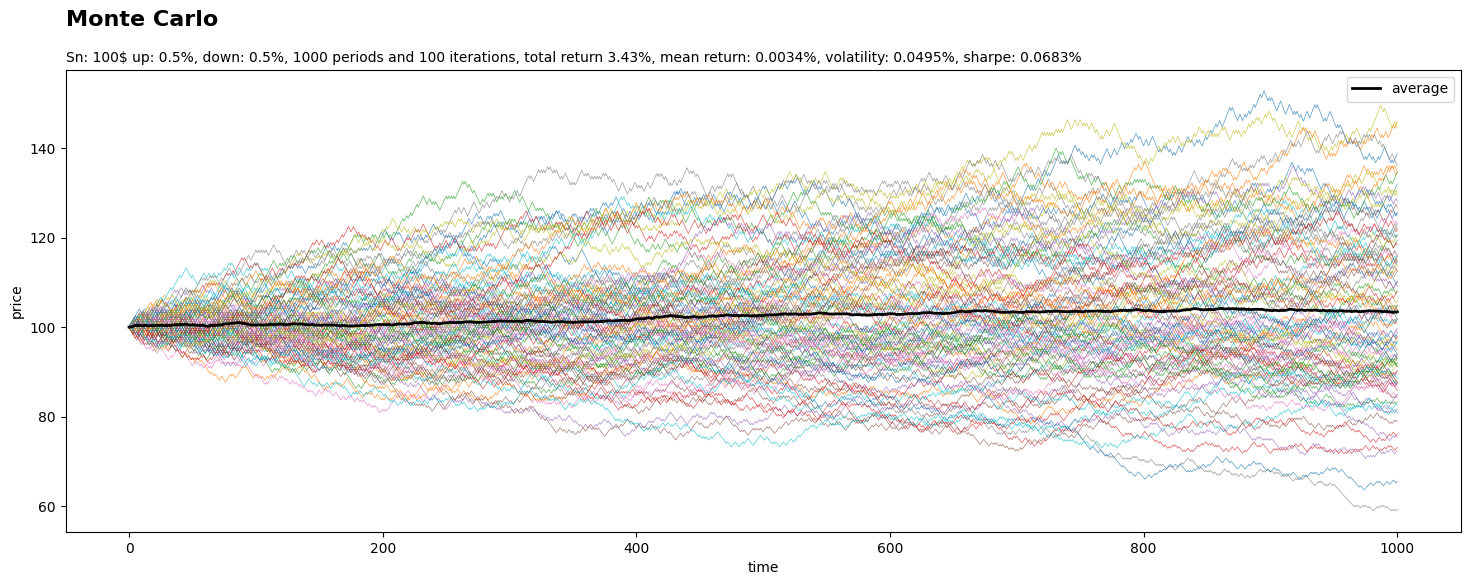

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

def stochastics(Sn=100, a=0.1, b=0.1, t=500, m=1000):

    paths = []

    for j in range(1,m+1):
        path = [Sn]
        S = Sn
        for i in range(1,t+1):
            p = rd.random()
            S *= (100+a)/100 if p > 0.5 else (100-b)/100
            path.append(S)
        paths.append(path)

    prices_array = np.array(paths).T
    prices_mean = prices_array.mean(axis=1)

    returns = np.diff(prices_mean) / prices_mean[:-1]
    total_return = (prices_mean[-1] - prices_mean[0]) / prices_mean[0] * 100 
    volatility = np.std(returns) * 100
    mean_return = np.mean(returns) * 100
    sharpe_ratio = mean_return / volatility if volatility > 0 else 0

    plt.figure(figsize=(18, 6))
    plt.plot(prices_array, alpha = 0.75, linewidth = 0.5)
    plt.plot(prices_mean, color = "black", linewidth = 2, label = "average")
    plt.xlabel("time")
    plt.ylabel("price")
    plt.suptitle(f"Monte Carlo", fontsize=16, fontweight='bold', x=0.125, ha='left')
    plt.title(f"Sn: {Sn}$ up: {a}%, down: {b}%, {t} periods and {m} iterations, total return {total_return:.2f}%, mean return: {mean_return:.4f}%, volatility: {volatility:.4f}%, sharpe: {sharpe_ratio:.4f}%", fontsize=10, fontweight='normal', loc='left')
    plt.legend()
    plt.savefig('plots/monte_carlo.pdf', dpi=300, bbox_inches='tight')
    plt.show()

stochastics(100, 0.5, 0.5, 1000, 100)
